<a href="https://colab.research.google.com/github/Ch0ro/ML-DL/blob/master/k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀


*   예측하려는 샘플에 가장 가까운 샘플 k를 선택
*   k개의 이웃 샘플들의 수치를 사용해 타킷을 예측 
*   ex) k개의 샘플들의 평균을 타켓의 수치로 예측








## 데이터 확인

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

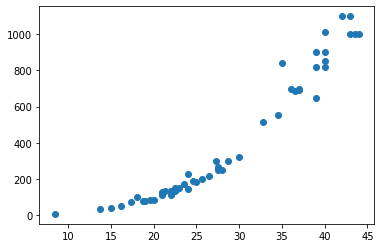

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel
plt.ylabel
plt.show()



*   농어(perch) 길이가 커짐에 따라 무게도 늘어나고있음


## 훈련 세트와 테스트 세트로 나누기

*   사이킷런에 사용할 훈련 세트는 2차원 배열이여야 한다는 것을 유의
*   현재 perch 데이터는 1차원 배열이므로 1개의 열이 있는 2차원 배열로 바꿔야함



In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)

In [15]:
test_array = np.array([1,2,3,4])
print(test_array.shape) # 1차원 배열은 이런식으로 원소 1개짜리 튜플로 나옴
print(test_array)

(4,)
[1 2 3 4]


In [16]:
test_array = test_array.reshape(2,2)
print(test_array.shape) # reshape 명령어를 통해 (4, ) -> (2,2) 즉, 2x2형태의 2차원 배열로 바뀜
print(test_array)

(2, 2)
[[1 2]
 [3 4]]




*   reshape()를 이용해 train_input과 test_input을 2차원 배열로 변경
*   열을 1로 맞추고 행을 -1로 설정하면 원소의 크기에 맞춰 알아서 진행됨





In [18]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1) 
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## KNeighborsRegressor (k-최근접 이웃 회귀) 모델 생성 및 훈련

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input,train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
knr.score(test_input,test_target) # 결정계수(R^2)

0.9928094061010639



*   분류 모델에서의 score는 샘플을 정확하게 분류한 개수의 비율 즉, 정확도를 나타냄
*   회귀 모델에서의 score는 이 점수를 결정계수라 부르며, 다음과 같이 구한다
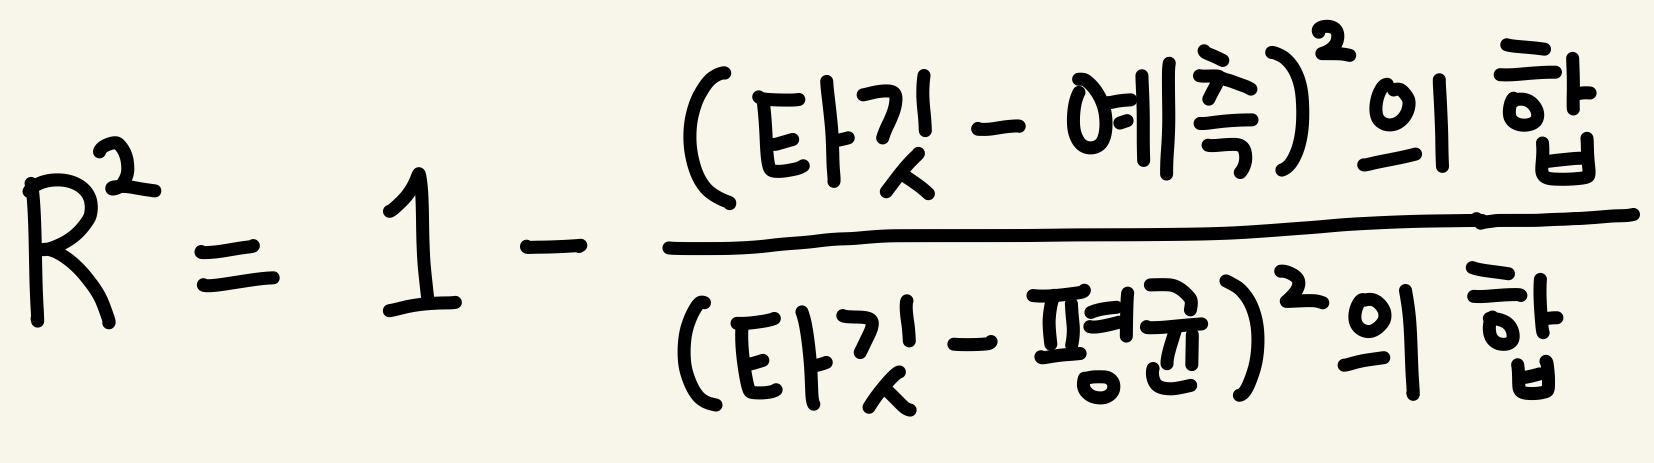



In [23]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차
mae = mean_absolute_error(test_target,test_prediction)
mae

19.157142857142862



*   예측이 평균적으로 19g 정도 타깃값과 다름



## 과대적합 vs 과소적합


*   지금까지 훈련 세트를 이용해 모델을 훈련하고 테스트 세트로 모델을 평가했음
*   훈련세트를 이용해 모델을 평가해본다면?



In [24]:
knr.score(train_input,train_target) 

0.9698823289099255



*   테스트 세트로 모델을 평가 한 경우 R^2 = 99%
*   훈련 세트로 모델을 평가 한 경우 R^2 = 97%
*   훈련 세트로 모델을 훈련했기 때문에 훈련세트로 모델을 평가 했을 때 R^2가 더 높아야 정상임
*   이는 '과소 적합'문제가 발생했다는 것을 의미
*   즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우임
*   이웃의 개수 k를 줄여서 모델을 복잡하게 만들어야 함







In [25]:
# 이웃의 개수를 기본 값 5에서 3으로 변경
knr.n_neighbors = 3 

# 모델 다시 훈련 (훈련 세트로 모델 평가)
knr.fit(train_input, train_target)
knr.score(train_input,train_target)

0.9804899950518966

In [26]:
knr.score(test_input, test_target)

0.974645996398761


**두 결과의 차이가 크지 않고 훈련 > 테스트 이므로 과소 및 과대 적합 문제가 없음**

 - 과소 적합 문제가 발생하면 k를 감소 시켜 모델을 복잡하게 만들고
 - 과대 적합 문제가 발생하면 k를 증가 시켜 모델을 단순하게 만들어야 함


